 ______  ___     ______                        _________
___   |/  /________  /_______ _______ ______________  /
__  /|_/ /_  __ \_  __ \  __ `/_  __ `__ \  _ \  __  / 
_  /  / / / /_/ /  / / / /_/ /_  / / / / /  __/ /_/ /  
/_/  /_/  \____//_/ /_/\__,_/ /_/ /_/ /_/\___/\__,_/   
                                                       
_____________ _________      ___________        _________            
___    |__  /_______  /_____ ___  /__  /_______ ______  /____________
__  /| |_  __ \  __  /_  __ `/_  /__  //_/  __ `/  __  /_  _ \_  ___/
_  ___ |  /_/ / /_/ / / /_/ /_  / _  ,<  / /_/ // /_/ / /  __/  /    
/_/  |_/_.___/\__,_/  \__,_/ /_/  /_/|_| \__,_/ \__,_/  \___//_/     
                                                                     



## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

# Task 01 : Simple Linear Regression - Salary Dataset

## Read Data

In [3]:
df1 = pd.read_csv(r"Salary Dataset - Simple linear regression/Salary_dataset.csv", index_col=0)
df1.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


## Analysis & Visualization

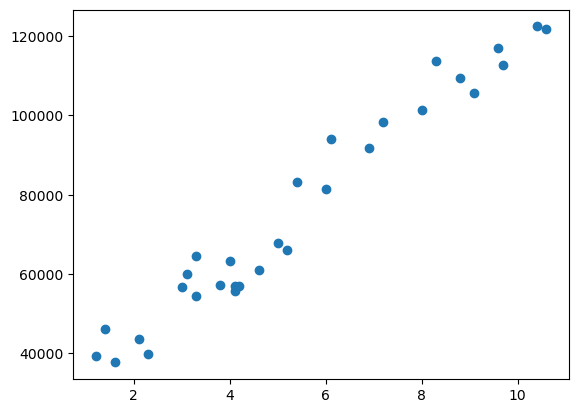

In [5]:
plt.scatter(df1["YearsExperience"], df1["Salary"])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df1["YearsExperience"], df1["Salary"], random_state=42, test_size = 0.2)

X_train = X_train.to_frame()
X_test  = X_test.to_frame()

## Modeling

In [7]:
linearReg_model = LinearRegression()
linearReg_model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = linearReg_model.predict(X_test)
print(rf"MAE : {mean_absolute_error(y_pred, y_test)}")
print(rf"MSE : {mean_squared_error(y_pred, y_test)}")
print(rf"R2  : {r2_score(y_pred, y_test)}")

MAE : 6286.453830757745
MSE : 49830096.855908334
R2  : 0.896183873758733


In [9]:
for real_value, predicted_value in zip(y_test, y_pred):
    print(f"Real : {str(round(real_value)).rjust(8)} | Predicted : {str(round(predicted_value)).rjust(8)}")

Real :   112636 | Predicted :   115791
Real :    67939 | Predicted :    71499
Real :   113813 | Predicted :   102598
Real :    83089 | Predicted :    75269
Real :    64446 | Predicted :    55479
Real :    57190 | Predicted :    60191


In [10]:
print(f"** Cross Validation Scores **")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error)
cv_scores = cross_val_score(linearReg_model, X_train, y_train, cv=kf, scoring=mse_scorer)

print("Cross-validation scores for each fold :", np.round(cv_scores, 2))
print("Mean cross-validation accuracy        :", round(cv_scores.mean(), 2))

** Cross Validation Scores **
Cross-validation scores for each fold : [13998817.77 24620273.98 25566346.87 51531955.81 45102586.38]
Mean cross-validation accuracy        : 32163996.16


# Task 02 : Polynomial Linear Regression Dataset

## Read Data

In [11]:
df2 = pd.read_csv(r"Polynomial Linear Regression Dataset/rank_salary.csv")
df2.head()

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


## Analysis & Visualization

In [13]:
len(df2["Position"].unique()) # It should be dropped

10

In [14]:
df2.drop(["Position"], axis=1, inplace=True)

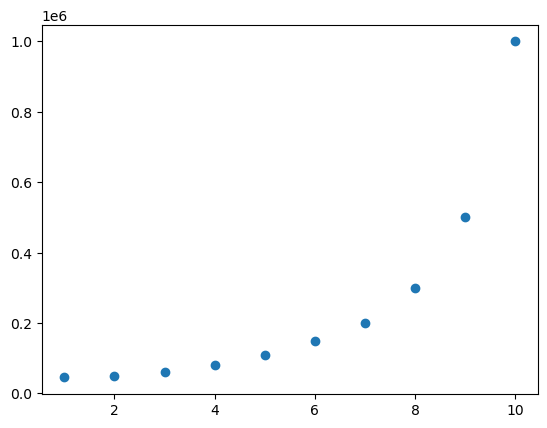

In [15]:
plt.scatter(df2["Level"], df2["Salary"])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df2["Level"], df2["Salary"], random_state=42, test_size = 0.2)

X_train = X_train.to_frame()
X_test  = X_test.to_frame()

## Modeling

In [17]:
linearReg_model = LinearRegression()
linearReg_model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = linearReg_model.predict(X_test)

print(rf"MAE : {mean_absolute_error(y_pred, y_test)}")
print(rf"MSE : {mean_squared_error(y_pred, y_test)}")
print(rf"R2  : {r2_score(y_pred, y_test)}")

MAE : 82607.75862068962
MSE : 7840057409.334121
R2  : 0.9171438647095278


In [19]:
for real_value, predicted_value in zip(y_test, y_pred):
    print(f"Real : {str(round(real_value)).rjust(8)} | Predicted : {str(round(predicted_value)).rjust(8)}")

Real :   500000 | Predicted :   550733
Real :    50000 | Predicted :   -64483


In [20]:
print(f"** Cross Validation Scores **")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error)
cv_scores = cross_val_score(linearReg_model, X_train, y_train, cv=kf, scoring=mse_scorer)

print("Cross-validation scores for each fold :", np.round(cv_scores, 2))
print("Mean cross-validation accuracy        :", round(cv_scores.mean(), 2))

** Cross Validation Scores **
Cross-validation scores for each fold : [6.71107400e+10 4.83083186e+10 2.83667474e+11 2.27496844e+09
 1.40045701e+09]
Mean cross-validation accuracy        : 80552391705.47


# Task 03 : Multiple Linear Regression Dataset

## Read Data

In [21]:
df3 = pd.read_csv(r"Multiple Linear Regression Dataset/multiple_linear_regression_dataset.csv")
df3.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


## Analysis & Visualization

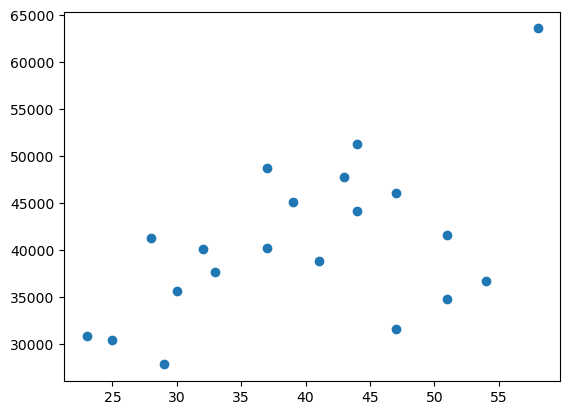

In [23]:
plt.scatter(df3["age"], df3["income"])

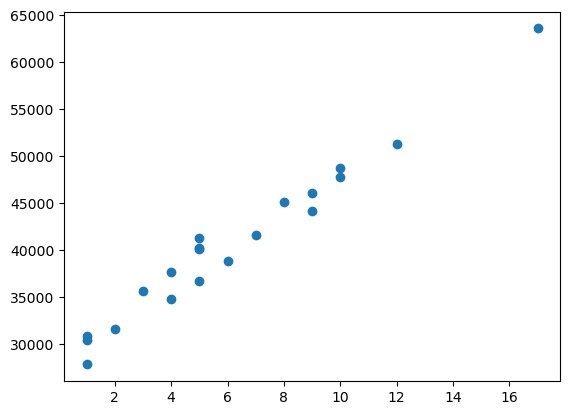

In [24]:
plt.scatter(df3["experience"], df3["income"])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop(["income"], axis=1), df3["income"], random_state=42, test_size = 0.2)

## Modeling

In [26]:
linearReg_model = LinearRegression()
linearReg_model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = linearReg_model.predict(X_test)

print(rf"MAE : {mean_absolute_error(y_pred, y_test)}")
print(rf"MSE : {mean_squared_error(y_pred, y_test)}")
print(rf"R2  : {r2_score(y_pred, y_test)}")

MAE : 797.9113810821873
MSE : 753796.7693734544
R2  : 0.9452244815314557


In [28]:
for real_value, predicted_value in zip(y_test, y_pred):
    print(f"Real : {str(round(real_value)).rjust(8)} | Predicted : {str(round(predicted_value)).rjust(8)}")

Real :    30450 | Predicted :    31093
Real :    30870 | Predicted :    31295
Real :    38900 | Predicted :    40250
Real :    35670 | Predicted :    34898


In [29]:
print(f"** Cross Validation Scores **")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error)
cv_scores = cross_val_score(linearReg_model, X_train, y_train, cv=kf, scoring=mse_scorer)

print("Cross-validation scores for each fold :", np.round(cv_scores, 2))
print("Mean cross-validation accuracy        :", round(cv_scores.mean(), 2))

** Cross Validation Scores **
Cross-validation scores for each fold : [2390672.98 4932002.53 2034641.94 2733765.61 1332969.45]
Mean cross-validation accuracy        : 2684810.5
